In [2]:
import pandas as pd

In [3]:
helm_ins = pd.read_csv('../../data/raw/insulin_meal/helm_insulin_bolus.csv')
helm_ins['ID'] = 'helm_'+helm_ins['ID'].astype(str)
dexip_ins = pd.read_csv('../../data/raw/insulin_meal/dexip_insulin_bolus.csv')
dexip_ins['ID'] = 'dexip_'+dexip_ins['ID'].astype(str)

In [4]:
ins = pd.concat([helm_ins, dexip_ins], ignore_index=True)
ins['time'] = pd.to_datetime(ins['time'])

ins.sort_values(by='time', inplace=True)

In [5]:
# Calculate the description (mean, std, min, max) of the time difference between insulin bolus for each patient
ins['diff'] = ins['time'].diff()
summary = ins.groupby('ID')['diff'].describe()

In [6]:
summary.reset_index(inplace=True)

In [7]:
summary.sort_values(by='max')

,ID,count,mean,std,min,25%,50%,75%,max
466,helm_1625,69,0 days 00:01:56.695652173,0 days 00:01:24.863091185,0 days 00:00:00,0 days 00:00:39,0 days 00:01:46,0 days 00:03:03,0 days 00:05:12
352,helm_1287,1,0 days 00:05:31,NaT,0 days 00:05:31,0 days 00:05:31,0 days 00:05:31,0 days 00:05:31,0 days 00:05:31
432,helm_1501,57,0 days 00:02:01.982456140,0 days 00:01:49.060188367,0 days 00:00:07,0 days 00:00:41,0 days 00:01:46,0 days 00:03:06,0 days 00:09:57
274,helm_1039,5,0 days 00:05:39.800000,0 days 00:04:08.751281403,0 days 00:01:10,0 days 00:01:29,0 days 00:07:12,0 days 00:07:58,0 days 00:10:30
696,helm_811,77,0 days 00:02:01.753246753,0 days 00:02:09.605591562,0 days 00:00:01,0 days 00:00:40,0 days 00:01:35,0 days 00:02:52,0 days 00:12:30
...,...,...,...,...,...,...,...,...,...
47,dexip_200,51,0 days 02:10:56.823529411,0 days 03:22:20.522805391,0 days 00:00:11,0 days 00:09:29,0 days 01:02:05,0 days 02:42:28,0 days 20:25:49
143,dexip_379,57,0 days 02:24:56.157894736,0 days 05:04:08.514049867,0 days 00:00:11,0 days 00:11:20,0 days 00:45:40,0 days 02:27:24,1 days 08:38:43
200,dexip_483,109,0 days 02:12:53.229357798,0 days 06:04:00.484770953,0 days 00:02:00,0 days 00:29:10,0 days 01:04:57,0 days 01:45:01,2 days 11:02:57
234,dexip_63,62,0 days 05:25:03.435483870,0 days 19:37:14.875966531,0 days 00:00:39,0 days 00:36:06.500000,0 days 02:38:22.500000,0 days 05:18:55.750000,6 days 12:10:31


#### Helm - 493 participants
30 participants have <60 bolus readings
65 participants have <90 bolus readings

#### Dexip - 259
14 <20 bolus readings
25 <30 bolus 

In [8]:
493+259

752

In [9]:
100*(25+65)/(493+259)

11.96808510638298

In [10]:
helm_ins.ID.nunique(), dexip_ins.ID.nunique()

(493, 259)

In [11]:
summary[summary['max']>pd.Timedelta('15 hours')]

,ID,count,mean,std,min,25%,50%,75%,max
34,dexip_171,31,0 days 02:42:47.548387096,0 days 03:58:30.982449011,0 days 00:00:49,0 days 00:20:50.500000,0 days 00:47:44,0 days 02:54:31.500000,0 days 15:12:15
47,dexip_200,51,0 days 02:10:56.823529411,0 days 03:22:20.522805391,0 days 00:00:11,0 days 00:09:29,0 days 01:02:05,0 days 02:42:28,0 days 20:25:49
143,dexip_379,57,0 days 02:24:56.157894736,0 days 05:04:08.514049867,0 days 00:00:11,0 days 00:11:20,0 days 00:45:40,0 days 02:27:24,1 days 08:38:43
200,dexip_483,109,0 days 02:12:53.229357798,0 days 06:04:00.484770953,0 days 00:02:00,0 days 00:29:10,0 days 01:04:57,0 days 01:45:01,2 days 11:02:57
210,dexip_504,51,0 days 02:34:23.411764705,0 days 03:53:26.803814113,0 days 00:01:16,0 days 00:22:56,0 days 01:02:34,0 days 02:24:28,0 days 17:41:38
234,dexip_63,62,0 days 05:25:03.435483870,0 days 19:37:14.875966531,0 days 00:00:39,0 days 00:36:06.500000,0 days 02:38:22.500000,0 days 05:18:55.750000,6 days 12:10:31
243,dexip_73,95,0 days 02:04:57.726315789,0 days 03:22:08.978962343,0 days 00:03:01,0 days 00:37:09.500000,0 days 01:04:58,0 days 01:43:51.500000,0 days 16:31:06
255,dexip_92,83,0 days 08:38:18.228915662,2 days 05:20:48.856927550,0 days 00:00:32,0 days 00:54:58,0 days 01:33:15,0 days 03:24:00.500000,20 days 07:49:55
666,helm_707,261,0 days 01:02:04.984674329,0 days 01:39:35.437187075,0 days 00:00:04,0 days 00:12:13,0 days 00:30:27,0 days 01:06:49,0 days 15:38:40


In [29]:
dexip_ids = summary[(summary['count']<20)&(summary['ID'].str.startswith('dexip'))]['ID'].values

In [30]:
helm_ids = summary[(summary['count']<60)&(summary['ID'].str.startswith('helm'))]['ID'].values

In [31]:
few_readings_ids = list(dexip_ids) + list(helm_ids)

<Axes: >

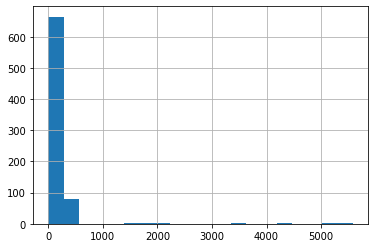

In [15]:
summary['count'].hist(bins=20)

In [32]:
df = pd.read_csv('../../data/tidy/paired_data/final_data_for_analysis_iob_check.csv')

In [17]:
df_insulin_mod = df[['ID', 'insulin_modality']].drop_duplicates()

In [18]:
df_insulin_mod

,ID,insulin_modality
0,helm_1,mdi
3,helm_4,mdi
8,helm_14,closed_loop
16,helm_18,closed_loop
18,helm_24,pump
...,...,...
1828,dexip_526,pump
1831,dexip_531,closed_loop
1832,dexip_534,closed_loop
1833,dexip_535,closed_loop


In [19]:
df_insulin_mod[df_insulin_mod['ID']=='dexip_281']

,ID,insulin_modality


In [33]:
df_insulin_mod_fewer = df_insulin_mod[df_insulin_mod['ID'].isin(few_readings_ids)]

In [21]:
49/543

0.09023941068139964

In [22]:
df['ID'].nunique()

531

In [23]:
df_insulin_mod_fewer.shape

(48, 2)

In [34]:
df_insulin_mod_fewer.insulin_modality.value_counts()

insulin_modality
pump           10
mdi             7
closed_loop     3
Name: count, dtype: int64

In [25]:
dexip_ids

array(['dexip_133', 'dexip_140', 'dexip_154', 'dexip_167', 'dexip_194',
       'dexip_197', 'dexip_209', 'dexip_213', 'dexip_237', 'dexip_255',
       'dexip_264', 'dexip_281', 'dexip_328', 'dexip_332', 'dexip_35',
       'dexip_354', 'dexip_387', 'dexip_394', 'dexip_398', 'dexip_40',
       'dexip_452', 'dexip_478', 'dexip_525', 'dexip_75', 'dexip_86'],
      dtype=object)

#### Multicolinearity

In [26]:
df['iob_kg']

0       0.000000
1       0.000000
2       0.018204
3       0.023475
4       0.000000
          ...   
3669    0.002750
3670    0.057512
3671    0.024557
3672    0.000000
3673    0.000000
Name: iob_kg, Length: 3674, dtype: float64

In [27]:
df[['iob_kg', 'start_roc', 'glc_change']].corr()


,iob_kg,start_roc,glc_change
iob_kg,1.000000,0.011428,-0.015241
start_roc,0.011428,1.000000,0.215129
glc_change,-0.015241,0.215129,1.000000


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Create the matrix of predictors (include all fixed effects if you want full multicollinearity check)
X = df[['iob_kg', 'start_roc', 'exercise', 'duration', 'age', 'cv', 'bmi', 'hba1c', 'glc']]  # exclude glc_quadratic for now
X = add_constant(X)  # required for VIF

# Compute VIFs
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


     feature         VIF
0      const  114.810844
1     iob_kg    1.036638
2  start_roc    1.389355
3   exercise    1.000252
4   duration    1.015887
5        age    1.141799
6         cv    1.418203
7        bmi    1.085672
8      hba1c    1.157392
9        glc    1.167797
